<h3>Problem Statement : </h3>Employees are considered as vital asset for an Organization and if its valuable employees are leaving, it can be a great loss for a company. Our example concerns a big company that wants to understand why some of their best and most experienced employees are leaving prematurely. The company also wishes to predict which valuable employees will leave next

<h3>Submission by :</h3> Name : Kunal Aaryen Sinha <br> University Roll No : 2013367 <br> Enrollment No. : GE-182013367 <br> Section : DS <br> Branch : CSE(DS & AI) <br> Course : B.Tech

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings


In [2]:
df=pd.read_csv("./HR.csv")

In [3]:
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
df.shape

(14999, 10)

## Explorartory Ananlysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Dataset contains 14999 rows and 10 columns, each row has the details of an employee.  
2 variables are categorical, remaining columns are of int and float

### Checking for any missing values

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
## Let's separate numerical and categorical vaiables into 2 dfs

def sep_data(data):
    
    numerics = ['int32','float32','int64','float64']
    num_data = df.select_dtypes(include=numerics)
    cat_data = df.select_dtypes(exclude=numerics)
    
    return num_data, cat_data

num_data,cat_data = sep_data(df)

In [9]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
## 1. Let's run VIF to check highly correlated and hence redundant variables.

features = num_data.drop(columns='left')
feature_list = "+".join(features.columns)
y, X = dmatrices('left~'+feature_list,num_data,return_type='dataframe')

In [12]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

VIF Factor               Features
0   35.759264              Intercept
1    1.063412     satisfaction_level
2    1.240498        last_evaluation
3    1.352436         number_project
4    1.278963   average_montly_hours
5    1.060520     time_spend_company
6    1.005260          Work_accident
7    1.007586  promotion_last_5years

The above table shows that there is no variable with a 'high" Variance Inflation Factor.
So, this method suggests we should not drop any variable

In [13]:
num_data.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

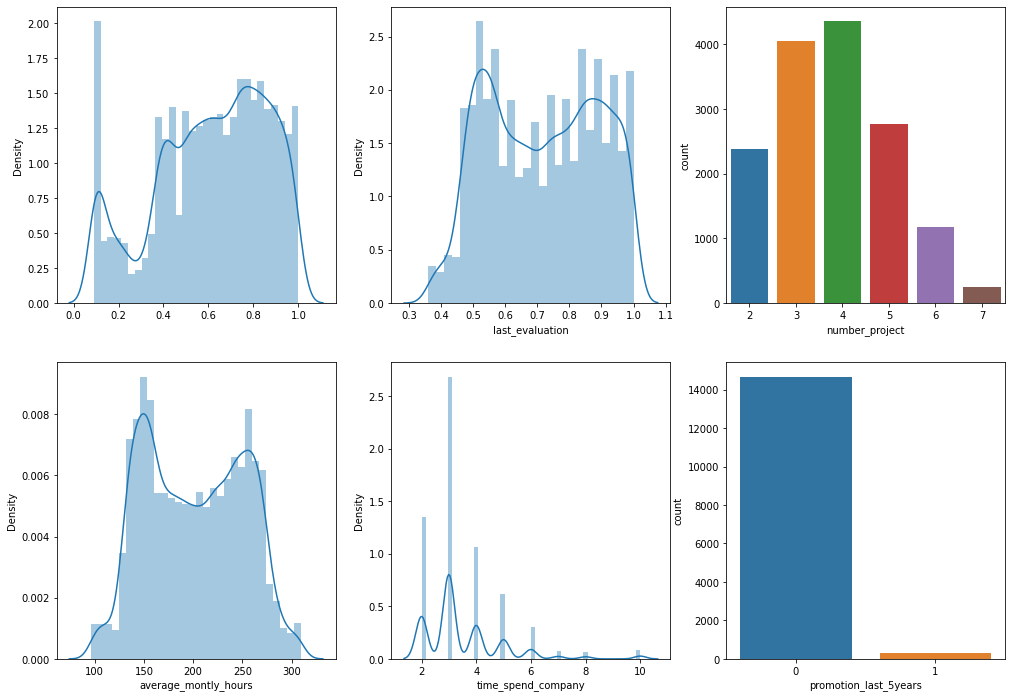

In [14]:
fig,ax = plt.subplots(2,3, figsize=(17,12))               
sns.distplot(x= df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.countplot(df['number_project'], ax = ax[0,2]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df['time_spend_company'], ax = ax[1,1]) 
sns.countplot(df['promotion_last_5years'], ax = ax[1,2])
plt.show()

Satisfaction - It is possible to observe that there are employees with a low level of satisfaction (<0.3). From the total, 1,941 people had a satisfaction level of less than 0.3. At the other end of the distribution, we have 6,502 employees with a satisfaction level equal to or above 0.7.

Last Evaluation - The company is made up of a majority of employees with medium to high valuation. For this analysis we will consider that a grade equal to or greater than 7 is considered high. Thus, we have 8,015 employees well evaluated by the company, this corresponds to 53% of the people.

Number of Project - Most are the emloyees are he ones who did 3-4 projects and the employees with 7 Projects are the least.There is no record of anyone working on a single project. The employees worked on at least 2 and at most 7 projects.

Average Monthly Hours -  Most of the employees worked for 150 to 250 hrs and highest density/frequency can be seen in this range

Time Spend - This is a positively skewed distribution, with a reduction in the number of employees per year as it approaches the right tail. Let's check this trend and confirm that the median value is less than the mean value through the statistical summary of the variable time_spend_company:

Promotions - Very few people promoted. Only 2% of people have already been promoted. Knowing the career plan policy would be important to understand this shortage of promotions.

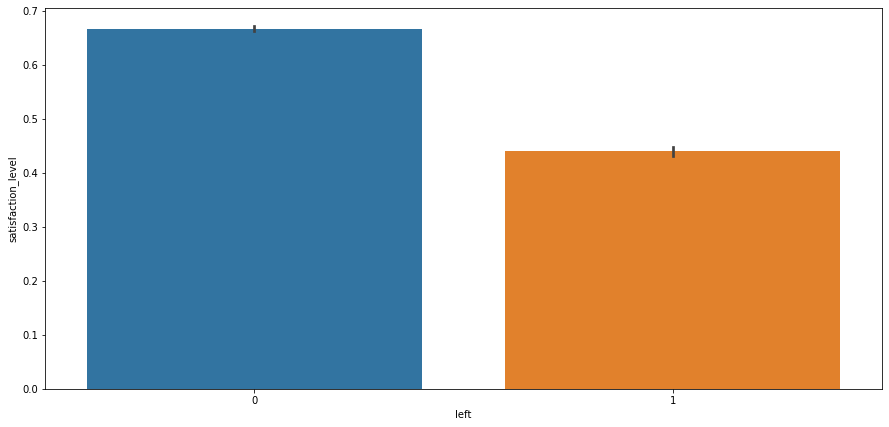

In [15]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='left', y ='satisfaction_level' ,data=df)
plt.show()

When we compare the proportions between the hired and those who leave, we notice that for the hired the satisfaction ranges that prevail are those of satisfaction and regular satisfaction, the two corresponding to 87% of the hired. For those who leave the dissatisfied range alone corresponds to 49% of this set. It is quite significant to think that half of who leaves were not satisfied.

Among the hired we observe that the satisfied ones form the largest group, followed by those of regular satisfaction, dissatisfied individuals are the minority.

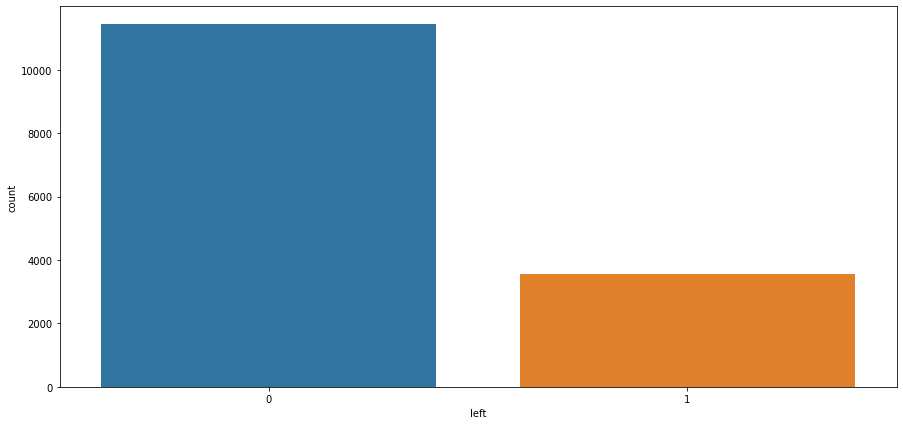

In [16]:
#Target Variable distribution
fig = plt.figure(figsize=(15,7))
sns.countplot(x='left',data=df)
plt.show()

### Did those who left receive a low salary?

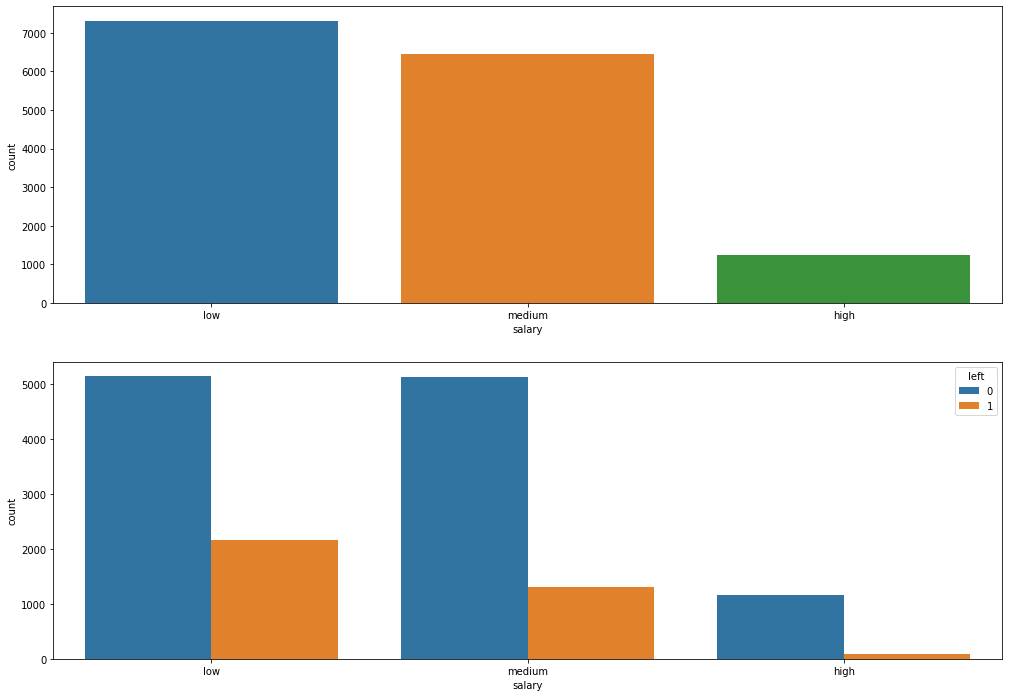

In [17]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(x='salary',data=df , ax=ax[0])
sns.countplot(x='salary', hue = 'left' , data=df , ax=ax[1])
plt.show()

### Employees in each Department

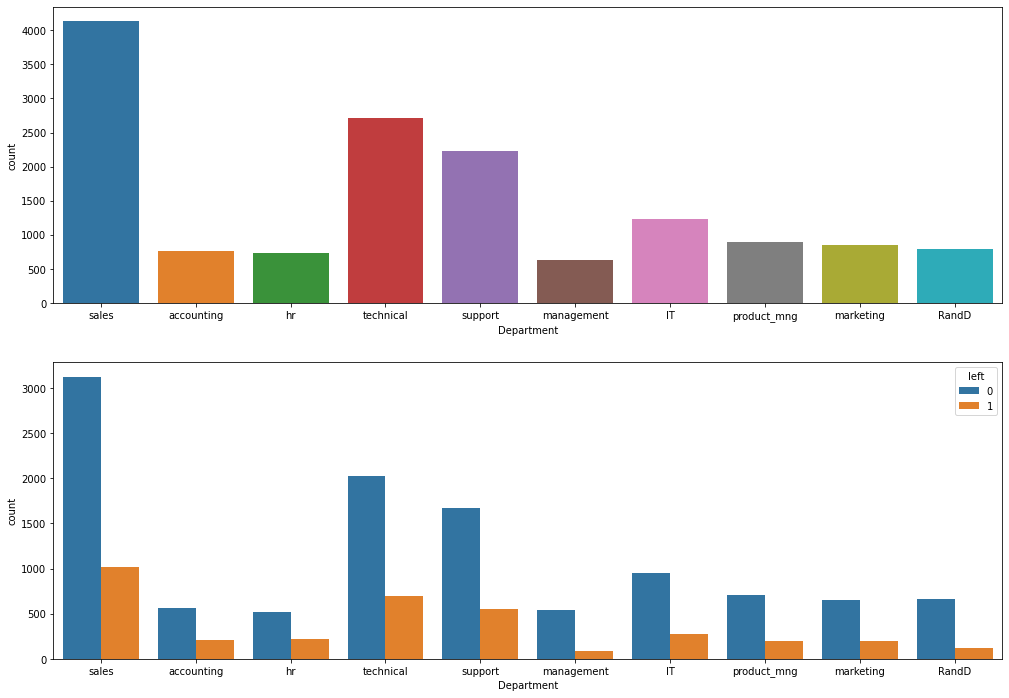

In [18]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(x='Department',data=df , ax=ax[0])
sns.countplot(df['Department'],hue=df['left'],data=df , ax=ax[1])
plt.show()


The Sales department is the one with the largest number of employees, followed by the Technical and Support department, totaling 9,089 employees. Management is the smallest of them with 630 employees.

### Department was salaries in relation with employees left

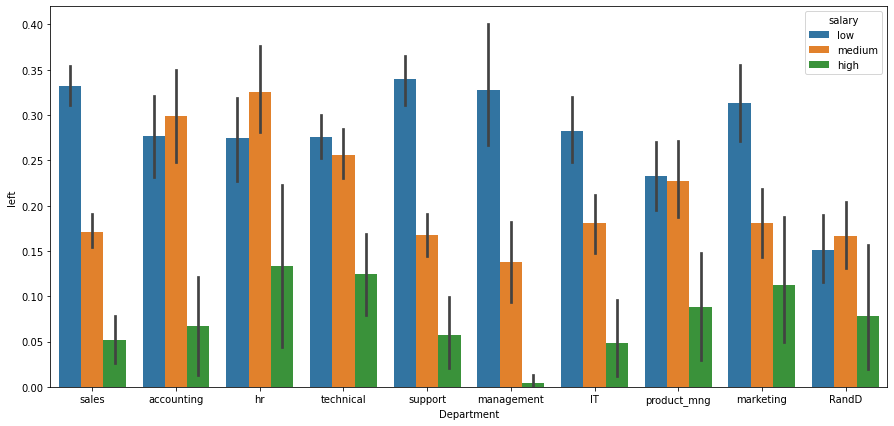

In [19]:
fig = plt.figure(figsize=(15,7))
sns.barplot(y='left',x='Department', hue= 'salary',data=df)
plt.show()

### Which Department employess left the company most

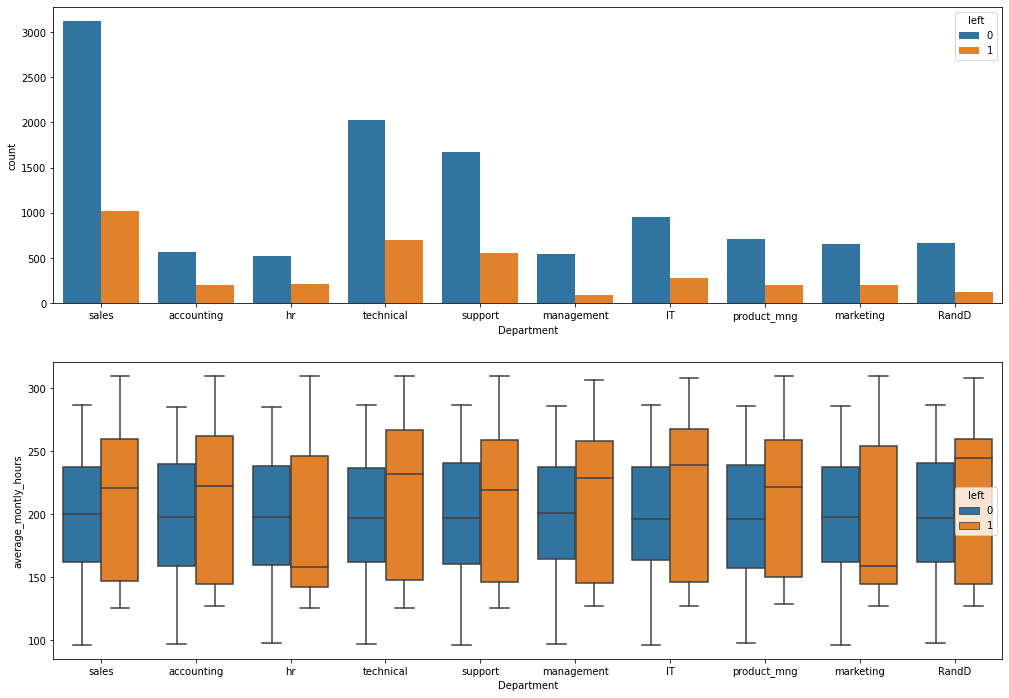

In [20]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(df['Department'],hue=df['left'],data=df , ax=ax[0])
sns.boxplot(y='average_montly_hours', x='Department', hue= 'left',data=df , ax=ax[1])
plt.show()

### We know that the employee who left work for longer hours and lower salaries, did they manage to stay in the company for many years?

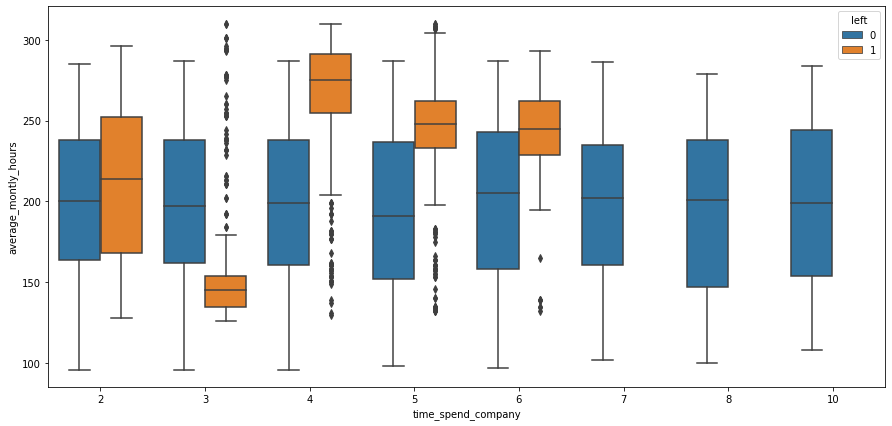

In [21]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='average_montly_hours',x='time_spend_company', hue= 'left',data=df)
plt.show()

Here,In the set of data we have people who have worked in the company between 2 and 10 years. For those who worked for a total of 2 years, we noticed the smallest difference between the hired and who leaves, but as already noticed, even in this group, who leaves tended to work for more hours. The data for those who worked for 3 years is quite different from the others, they exhibit a new grouping of people who leaves and worked less hours than the average monthly. During the univariate graphs section, when we printed the distribution of the total number of people per years worked, we observed a peak in the 3rd year and from there a fall in the total of people per year after the 4th year.

### Is the employee's dissatisfaction a factor for departure? 

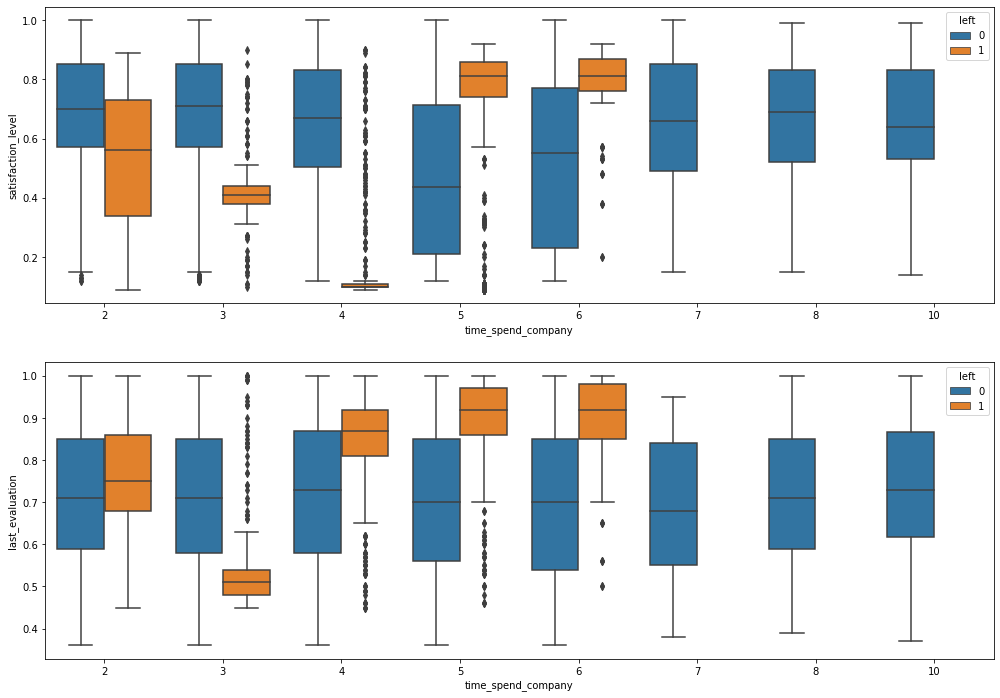

In [22]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.boxplot(y='satisfaction_level',x='time_spend_company', hue= 'left',data=df , ax=ax[0])
sns.boxplot(y='last_evaluation',x='time_spend_company', hue= 'left',data=df , ax=ax[1])
plt.show()

We see dissatisfaction with employees who leave the company in the 3rd or 4th year. People who left the company in the 5th grade, mostly showed low or high satisfaction. Most of then who worked at the company for 6 years demonstrated a high satisfaction level of over 0.75. 

Again the 3rd year appears as a divisor. The people who left the company in the 3rd year received a low score in the last evaluation, a fact that does not repeat from the 4th to the 6th year, where the majority of those employees received grades higher than 0.8.

### Does the salary received depends upon  on projects done

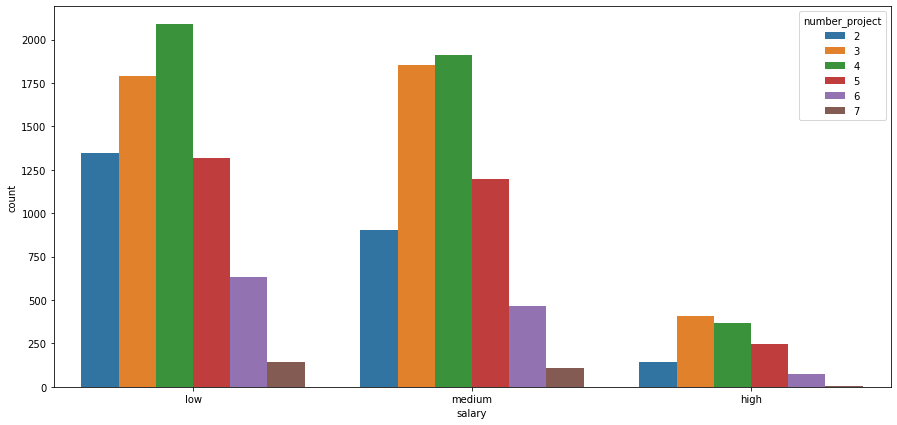

In [23]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary', hue = 'number_project',data=df)
plt.show()

Both people with high, medium or low salary worked on 2 projects or more. Around 140 people worked on 7 projects and received a low salary. So answering the question, we can see no evidence that the larger the number of projects, the better the salary range.

### Did Employees who were involved in more projects received more?`

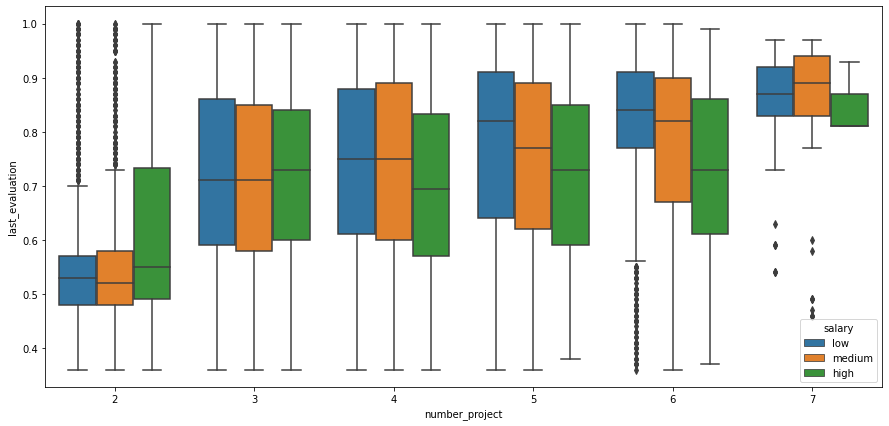

In [24]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='last_evaluation',x='number_project', hue= 'salary',data=df)
plt.show()

This chart brings new and relevant information, only who left worked on 7 projects, one more evidence of who left was overwhelmed. Those who left the company involved in 2 projects, regardless of the salary range, predominantly received low scores in their evaluations. People with more than 4 projects tended to receive better grades in their assessments.

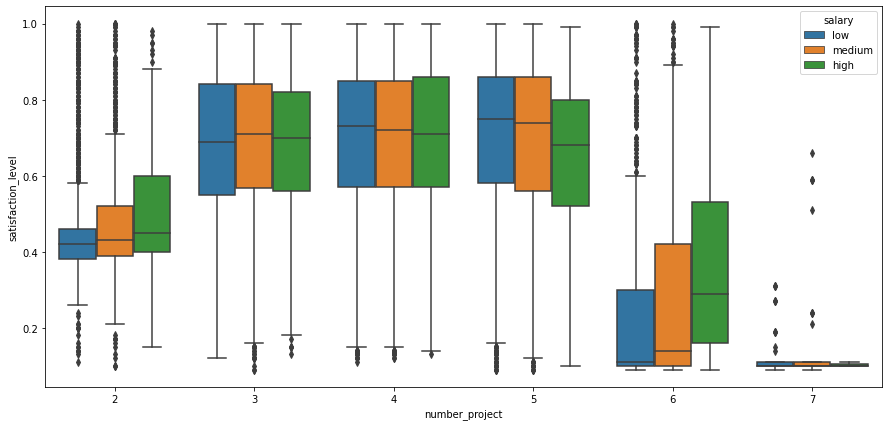

In [25]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='satisfaction_level',x='number_project', hue= 'salary',data=df)
plt.show()

We have people who left with the most diverse levels of satisfaction, the proportion of people by satisfaction range and numbers of projects can help us to understand these values. In this plot we have the proportion of the satisfaction of who left by numbers of projects. We see the polarization again, people with 2 projects showed a low to regular satisfaction. The same goes for the group with 6 or 7 projects. Employees who worked on 4 or 5 projects had a predominantly high satisfaction.


### Is Work Load a reason for employee Atrrition.

<Figure size 648x648 with 0 Axes>

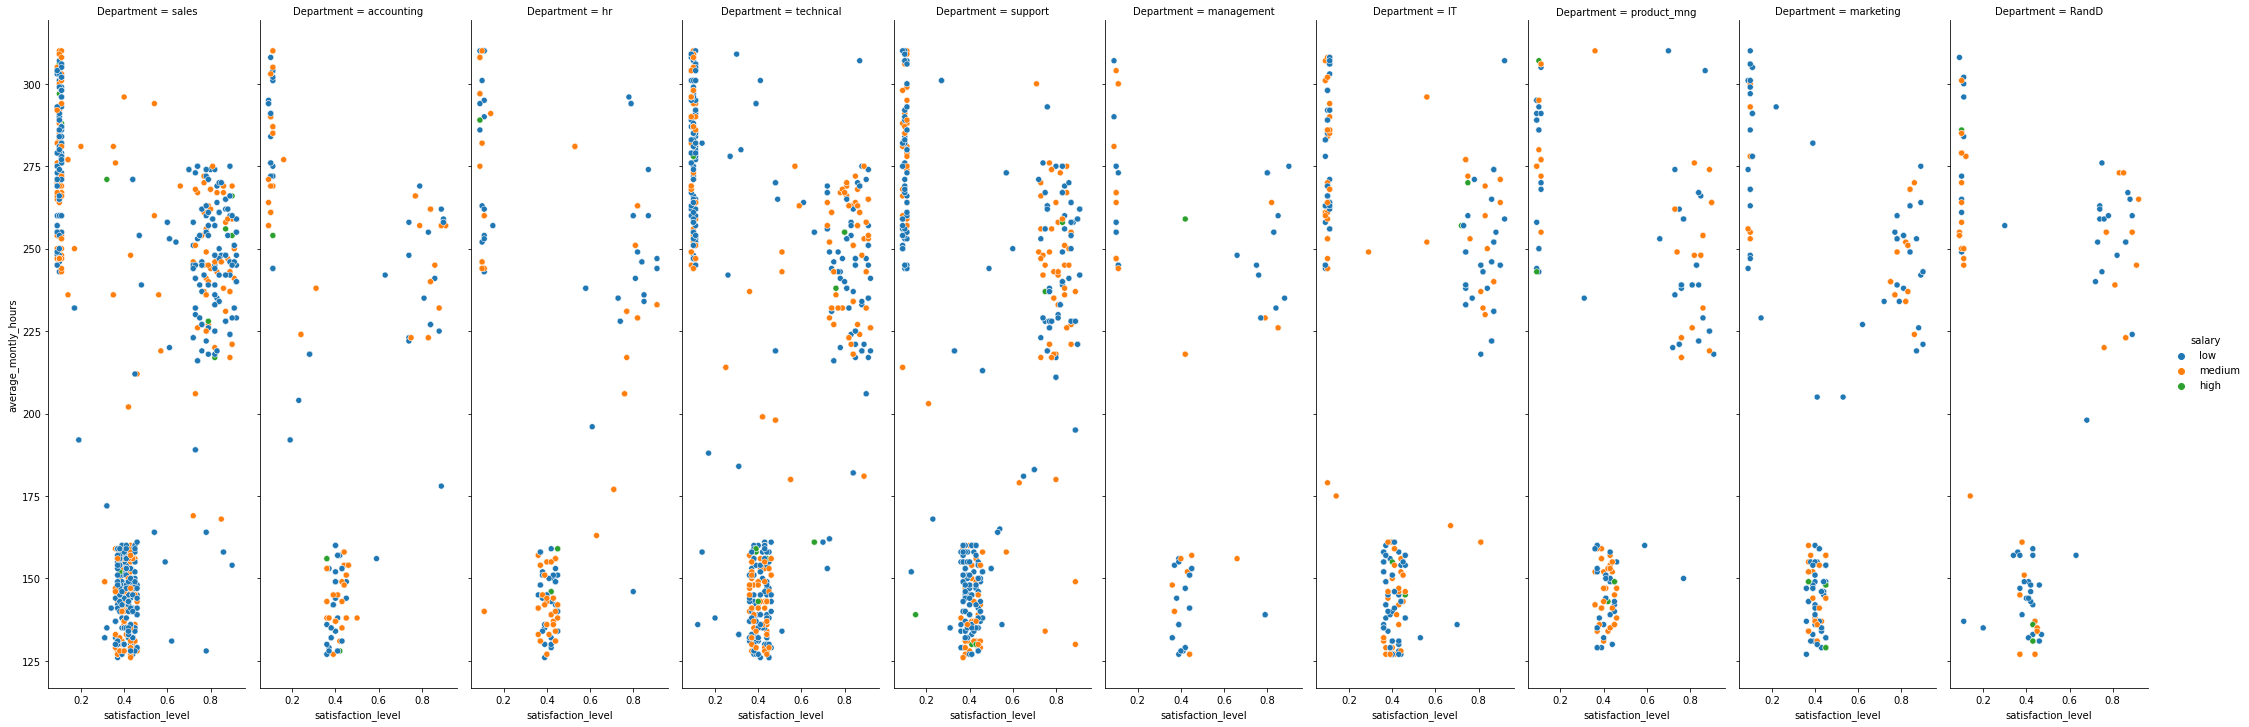

In [26]:
# Find the effect of satisfaction level and the average monthly hours with department and salary level
# on departure of  employees.
plt.figure(figsize=(9,9))
sns.relplot(x="satisfaction_level",
                y="average_montly_hours",
                col="Department",
                hue="salary",
                kind="scatter",
                height=10,
                aspect=0.3,
                data=df[df['left']==1])

<Figure size 648x648 with 0 Axes>

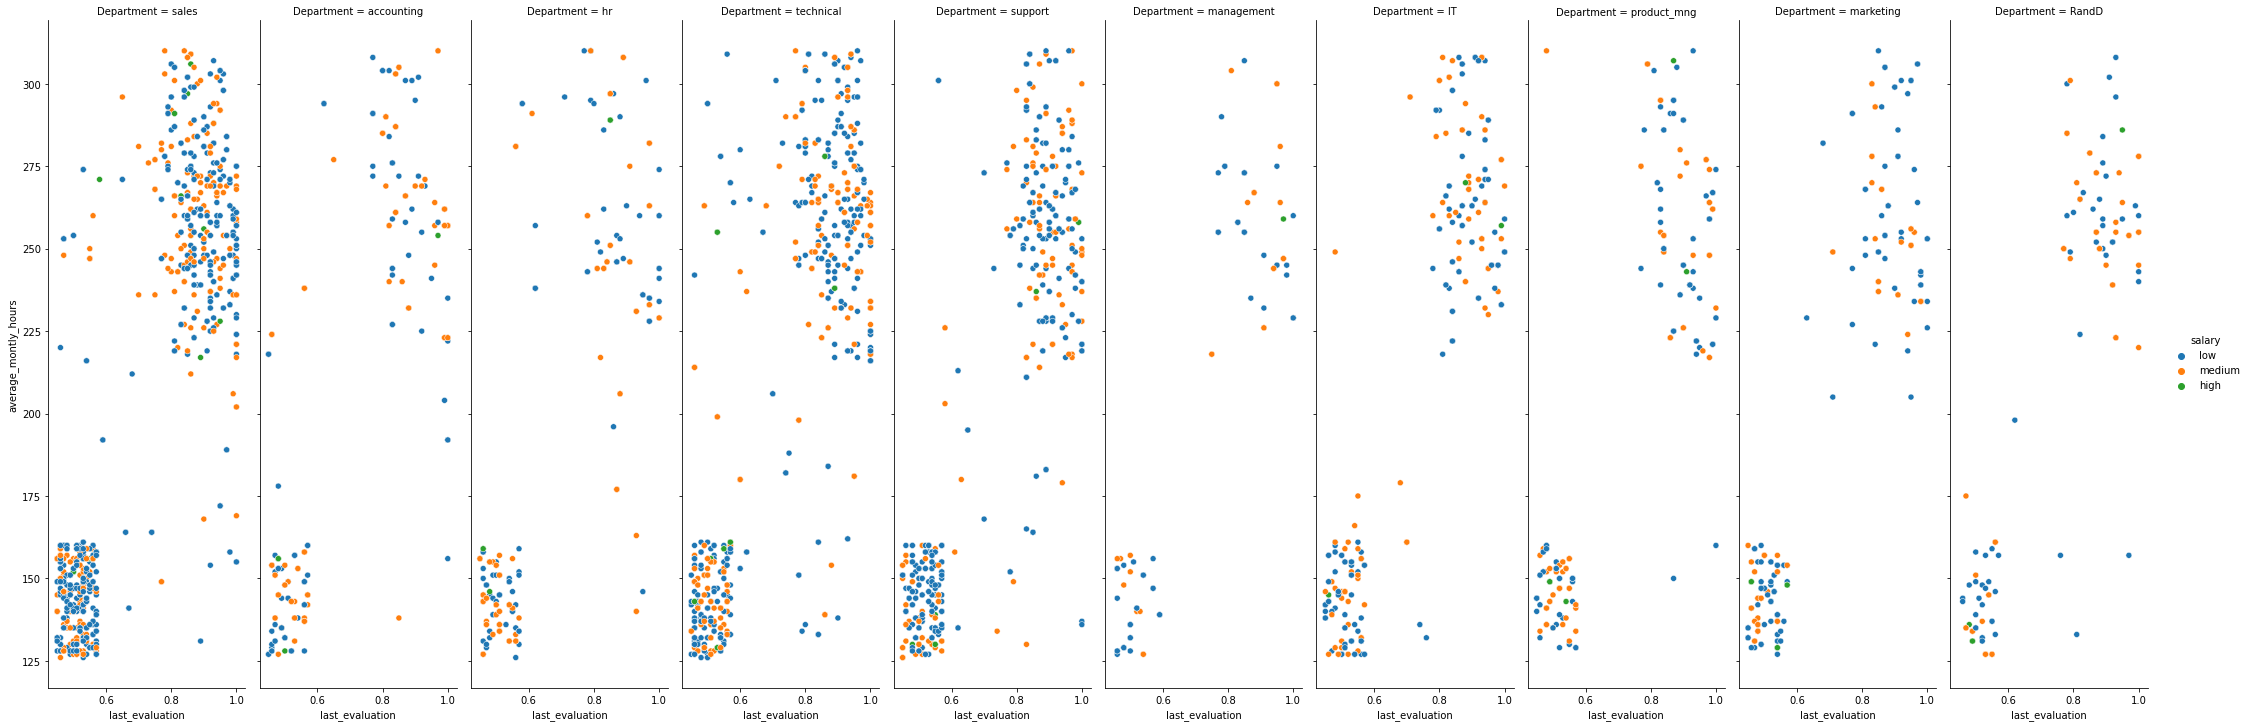

In [27]:
plt.figure(figsize=(9,9))
sns.relplot(x="last_evaluation",
                y="average_montly_hours",
                col="Department",
                hue="salary",
                kind="scatter",
                height=10,
                aspect=0.3,
                data=df[df['left']==1])

### Work Accident

In [28]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

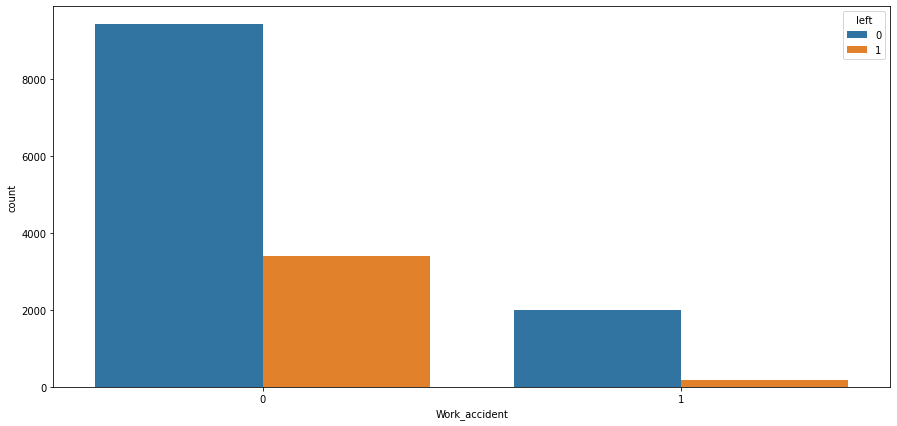

In [29]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Work_accident', hue = 'left',data=df)
plt.show()

Both people with high, medium or low salary worked on 2 projects or more. 144 people worked on 7 projects and received a low salary. So answering the question, I saw no evidence that the larger the number of projects, the better the salary range.

Even though they have suffered an accident at work, the employees remain in the company. This variable does not seem to be related to the employee's exit.

Now that we know the importance of the variables satisfaction_level and average_montly_hours we will calculate the value of the pearson correlation for the data set variables hr:

### Correlation Matrix

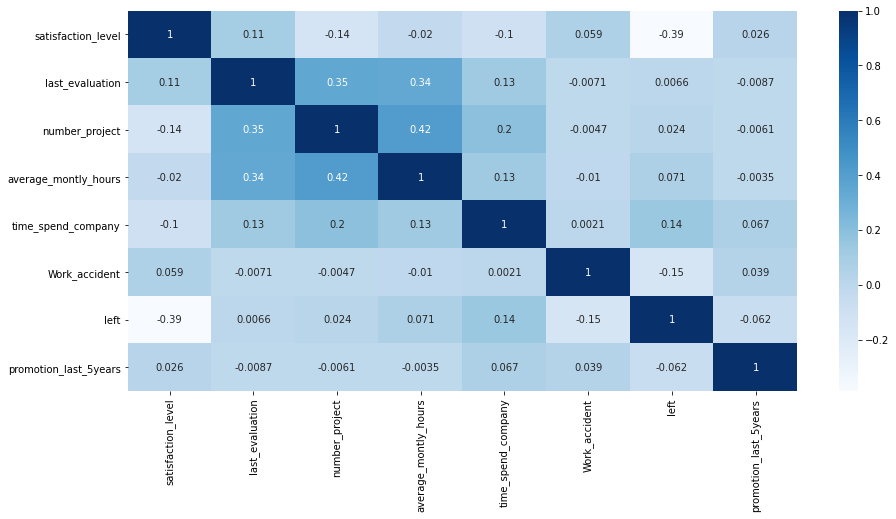

In [30]:
fig = plt.figure(figsize=(15,7))
cor_mat=num_data.corr()
sns.heatmap(cor_mat ,annot = True, cmap='Blues')
plt.show()

The darker, the more correlated are the variables, the whites have negative correlation values and the positive blue ones.

For the left variable the correlations were found:

- Satisfaction_level = This was expected, with a value of -0.39 that is variable with the strongest correlation with left
- Work_accident = Poor correlation, value -0.15
- Time_spend_company = Poor correlation, value 0.14
- Average_montly_hours = Very poor correlation, value 0.071
- last_evaluation = Very weak correlation, value 0.0066
- number_project = Very poor correlation, value 0.024
- Promotion_last_5years = Very weak correlation, value -0.062

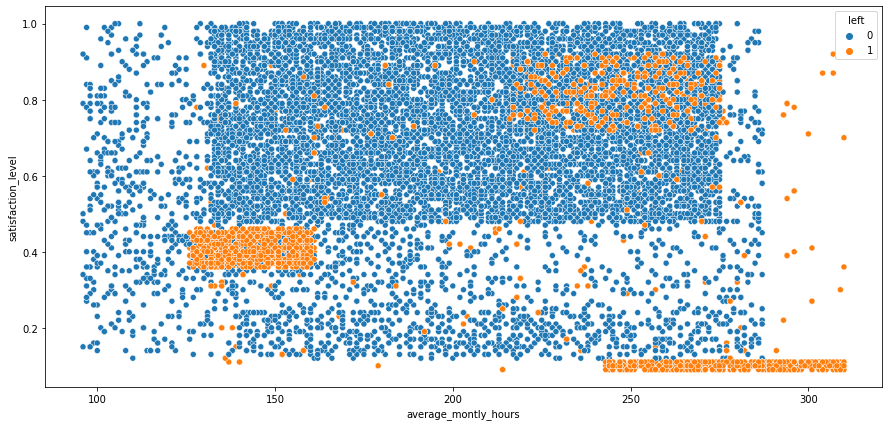

In [31]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x="average_montly_hours", y= "satisfaction_level",hue='left' ,data=df)
plt.show()

We see here a summary of the observations made in this project, we conclude that the people who left the company were overburdened and unsatisfied. For those people we have:

- The unsatisfied who worked less than the general average and those who worked more than the average and more than the remain;

- Those with a good level of satisfaction, but who also had a monthly average of hours worked over 201 hours of the general average.

## Data Preprocessing
Convert the salary column to categorical

In [32]:
df.salary=df.salary.astype('category')
df.salary=df.salary.cat.reorder_categories(['low', 'medium', 'high'])
df.salary = df.salary.cat.codes

In [33]:
departments = pd.get_dummies(df.Department)
departments.head(5)

IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0

In [34]:
departments = departments.drop("accounting", axis=1)
df = df.drop("Department", axis=1)
df = df.join(departments)
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  IT  \
0                   3              0     1                      0       0   0   
1                   6              0     1                      0       1   0   
2                   4              0     1                      0       1   0   
3                   5              0     1                      0       0   0   
4                   3              0     1                      0       0   0   

   RandD  hr  management  marketing  product_mng  sales  support  technical  
0      0   0           0          0            0      1        0          0  
1      0   0           0          0            0      1        0          0  
2      0   0           0          0            0      1        0          0  
3      0   0           0          0            0      1        0          0  
4      0   0           0          0            0      1        0          0

As the values in the column satisfaction_level and last_evaluation are not in the order of the other entries we can multiply the values in the column by a constant to make it in the order of the column values. Since the columns are a kind of rating multiplying it by 10 won't change the meaning, previously the ratings were out of 1,now it would be out of 10.

In [35]:
df.satisfaction_level=df.satisfaction_level*10
df.last_evaluation=df.last_evaluation*10

### Percentage of Employee Churn/Left

In [36]:
n_employees = len(df)
print(df.left.value_counts())
print(df.left.value_counts()/n_employees*100)

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64


11,428 employees stayed, which accounts for about 76% of the total employee count. Similarly, 3,571 employees left, which accounts for about 24% of them

In [37]:
def count_target_plot(data,target):
    plt.figure(figsize=(8,8))
    ax=sns.countplot(data=data,x=data[target],order=data[target].value_counts().index)
    plt.xlabel('Target Variable- Left')
    plt.ylabel('Distribution of target variable')
    plt.title('Distribution of Left')
    total = len(data)
    for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

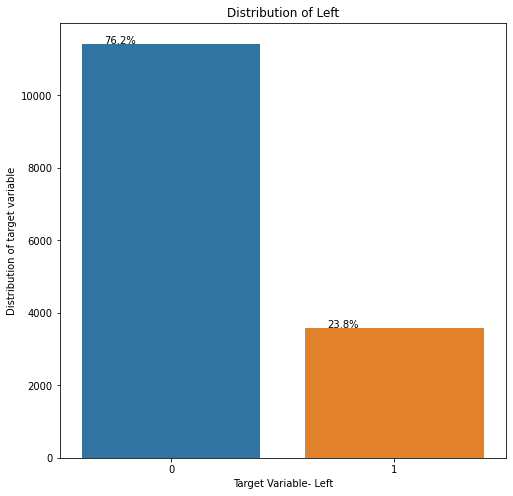

In [38]:
count_target_plot(df,'left')

###  Seperating target and features
lets seperate the dependent variable(target) and the independent variables(predictors) seperately

In [39]:
target=df.left
features=df.drop('left',axis=1)

### Splitting the dataset
We will split both target and features into train and test sets with 80%/20% ratio, respectively

In [40]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(features, target):
        features_train, features_test = features.iloc[train_index], features.iloc[test_index]
        target_train, target_test = target.iloc[train_index], target.iloc[test_index]

In [41]:
smote = SMOTE(sampling_strategy='minority', random_state=47)
os_values, os_labels = smote.fit_sample(features_train, target_train)
features_train = pd.DataFrame(os_values)
target_train = pd.DataFrame(os_labels)
print("Dimensions of Oversampled dataset is :", os_values.shape)

Dimensions of Oversampled dataset is : (18284, 17)


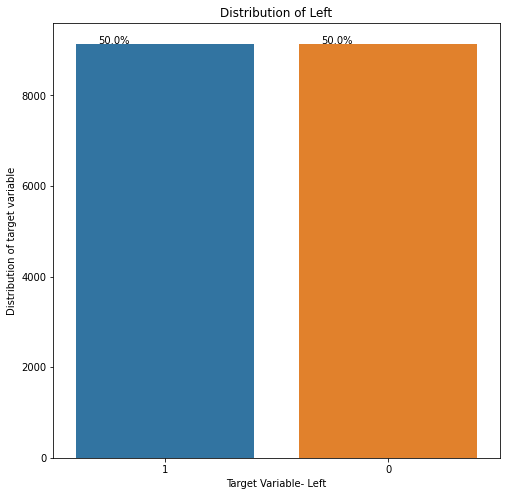

In [42]:
count_target_plot(target_train,'left')

The Tagret Variable is balanced now, we can move forward to predictive modeling 

## Model Building

### Logistic Regression

In [43]:
logr = LogisticRegression(random_state=42)
logr.fit(features_train, target_train)
y_pred_logr = logr.predict(features_test)
print("Score on Train data : " , logr.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_logr)*100)

Score on Train data :  79.71450448479544
Score on Test data :  76.9


### Decision tree 

In [44]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(features_train, target_train)
y_pred_DT = DT.predict(features_test)
print("Score on Train data : " , DT.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_DT)*100)

Score on Train data :  100.0
Score on Test data :  96.83333333333334


As we saw above the accuracy is 100% on training and test set, model is overfitting. So we will purne the tree, by setting the maximum depth and limiting the sample size

In [45]:
DT1 = DecisionTreeClassifier(max_depth=12,min_samples_leaf=1, random_state=42)
DT1.fit(features_train, target_train)
y_pred_DT1 = DT1.predict(features_test)
print("Score on Train data : " , DT1.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_DT1)*100)

Score on Train data :  98.34828265149858
Score on Test data :  97.23333333333333


### Random Forest

In [46]:
RF = RandomForestClassifier(random_state=42)
RF.fit(features_train, target_train)
y_pred_RF = RF.predict(features_test)
print("Score on Train data : " , RF.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_RF)*100)

Score on Train data :  100.0
Score on Test data :  99.13333333333333


As we saw above the accuracy is 100% on training and test set, model is overfitting,
So we will set the maximum depth , limiting the sample size, and maximum features.


In [47]:
RF1 = RandomForestClassifier(min_samples_leaf=1, max_features= 6, max_depth=16,random_state=42)
RF1.fit(features_train, target_train)
y_pred_RF1 = RF.predict(features_test)
print("Score on Train data : " , RF1.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_RF1)*100)

Score on Train data :  99.74294465106104
Score on Test data :  99.13333333333333


### KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(features_train, target_train)
y_pred_knn = knn.predict(features_test)
print("Score on Train data : " , knn.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_knn)*100)

Score on Train data :  98.14045066725005
Score on Test data :  95.06666666666666


In [49]:
print("Logistic Regression : ")
print(classification_report(target_test,y_pred_logr))
print("=======================================================")
print("Decison Tree : ")
print(classification_report(target_test,y_pred_DT))
print(classification_report(target_test,y_pred_DT1))
print("=======================================================")
print("Random Forest : ")
print(classification_report(target_test,y_pred_RF))
print(classification_report(target_test,y_pred_RF1))
print("=======================================================")
print("KNN : ")
print(classification_report(target_test,y_pred_knn))

Logistic Regression : 
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.79      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.78      3000

Decison Tree : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.90      0.97      0.94       714

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.96      0.94       714

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97  